In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-03.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.950063,7.018723,50.937656,6.998714,2020-03-03 12:26:02,2020-03-03 12:56:02,30.0,1968.0,28123664,28186419,3626.0,NaN,BIKE 21381,2549
1,50.937656,6.998714,50.931719,6.991636,2020-03-03 14:10:02,2020-03-03 14:18:02,8.0,826.0,28186419,28188864,74.0,NaN,BIKE 21381,2522
2,50.931719,6.991636,50.930753,6.994297,2020-03-03 17:53:02,2020-03-03 17:58:01,5.0,215.0,28188864,28195415,215.0,NaN,BIKE 21381,2527
3,50.930753,6.994297,50.931347,6.991467,2020-03-03 18:00:02,2020-03-03 18:04:03,4.0,209.0,28195415,28195665,2.0,NaN,BIKE 21381,2484
4,50.931347,6.991467,50.931112,6.994412,2020-03-03 19:18:02,2020-03-03 19:22:01,4.0,208.0,28195665,28198028,74.0,NaN,BIKE 21381,2481


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

48539

In [14]:
len(out_distances_total)

6710

In [15]:
len(out_rides)

4996

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

8607

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

3099

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

14.0       63
11.0       60
10.0       55
17.0       55
13.0       54
20.0       54
6.0        53
7.0        51
8.0        51
18.0       50
12.0       50
9.0        49
16.0       49
15.0       48
21.0       47
19.0       45
22.0       43
25.0       39
23.0       37
24.0       36
650.0      35
5.0        35
4.0        35
26.0       34
28.0       34
30.0       32
3.0        32
32.0       31
550.0      31
29.0       31
           ..
5566.0      1
7060.0      1
11057.0     1
7158.0      1
6723.0      1
5940.0      1
5123.0      1
5618.0      1
7330.0      1
4717.0      1
4624.0      1
6667.0      1
4171.0      1
4902.0      1
5195.0      1
4288.0      1
5973.0      1
6160.0      1
4387.0      1
4694.0      1
5686.0      1
4343.0      1
5630.0      1
6709.0      1
5256.0      1
4819.0      1
5412.0      1
4765.0      1
4501.0      1
6357.0      1
Name: distance, Length: 5900, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

3611

In [23]:
len(out_distances + out_rides)

8607

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

17.73213292404046


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39932 entries, 0 to 39931
Data columns (total 15 columns):
index                   39932 non-null int64
lat_begin               39932 non-null float64
lng_begin               39932 non-null float64
lat_end                 39932 non-null float64
lng_end                 39932 non-null float64
ride_begin              39932 non-null object
ride_end                39932 non-null object
ride_time               39932 non-null float64
distance                39932 non-null float64
uid_begin               39932 non-null int64
uid_end                 39932 non-null int64
standing_before_ride    39932 non-null float64
address                 201 non-null object
name                    39932 non-null object
available_bikes         39932 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 4.6+ MB


In [27]:
df_c['distance'].value_counts()

650.0     35
550.0     31
564.0     30
1047.0    30
533.0     29
713.0     29
736.0     28
561.0     28
447.0     28
857.0     28
638.0     28
609.0     27
541.0     27
836.0     27
747.0     27
691.0     27
486.0     27
591.0     27
614.0     27
1009.0    27
535.0     26
965.0     26
542.0     26
968.0     26
1025.0    26
420.0     26
1036.0    26
628.0     26
647.0     26
735.0     26
          ..
8130.0     1
5290.0     1
5013.0     1
5652.0     1
8466.0     1
6601.0     1
4580.0     1
5343.0     1
4931.0     1
3998.0     1
3448.0     1
7046.0     1
5945.0     1
6264.0     1
4900.0     1
5631.0     1
5773.0     1
4332.0     1
5230.0     1
3821.0     1
5877.0     1
5985.0     1
5487.0     1
6134.0     1
4477.0     1
4875.0     1
5913.0     1
7477.0     1
3460.0     1
6705.0     1
Name: distance, Length: 5694, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

8.0      1719
9.0      1714
7.0      1611
10.0     1557
11.0     1531
6.0      1429
12.0     1425
13.0     1363
14.0     1271
15.0     1164
16.0     1161
17.0     1126
18.0     1029
19.0      975
20.0      921
21.0      856
23.0      852
5.0       840
22.0      823
24.0      792
25.0      707
26.0      656
29.0      593
28.0      586
27.0      580
31.0      511
30.0      504
32.0      496
33.0      427
34.0      373
         ... 
369.0       1
541.0       1
588.0       1
568.0       1
444.0       1
240.0       1
515.0       1
394.0       1
375.0       1
439.0       1
445.0       1
627.0       1
550.0       1
610.0       1
558.0       1
647.0       1
336.0       1
611.0       1
597.0       1
327.0       1
462.0       1
523.0       1
571.0       1
339.0       1
636.0       1
546.0       1
353.0       1
585.0       1
456.0       1
617.0       1
Name: ride_time, Length: 601, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[2,
 3,
 4,
 27,
 46,
 67,
 68,
 86,
 92,
 97,
 151,
 180,
 253,
 266,
 294,
 303,
 335,
 336,
 356,
 429,
 442,
 496,
 503,
 508,
 518,
 602,
 655,
 760,
 808,
 809,
 828,
 865,
 912,
 1028,
 1091,
 1095,
 1099,
 1102,
 1118,
 1175,
 1290,
 1322,
 1323,
 1353,
 1417,
 1423,
 1524,
 1639,
 1652,
 1663,
 1679,
 1757,
 1780,
 1787,
 1807,
 1817,
 1838,
 1952,
 1989,
 2122,
 2165,
 2167,
 2174,
 2189,
 2190,
 2261,
 2262,
 2307,
 2325,
 2330,
 2335,
 2353,
 2371,
 2390,
 2408,
 2411,
 2550,
 2577,
 2592,
 2604,
 2620,
 2655,
 2669,
 2724,
 2796,
 2856,
 2881,
 2943,
 2973,
 3000,
 3021,
 3029,
 3051,
 3120,
 3204,
 3231,
 3323,
 3460,
 3463,
 3481,
 3539,
 3574,
 3601,
 3661,
 3666,
 3838,
 3937,
 3941,
 3973,
 4004,
 4033,
 4094,
 4134,
 4146,
 4147,
 4221,
 4250,
 4266,
 4277,
 4295,
 4339,
 4340,
 4362,
 4366,
 4437,
 4471,
 4480,
 4494,
 4495,
 4560,
 4576,
 4609,
 4653,
 4666,
 4699,
 4713,
 4728,
 4729,
 4730,
 4738,
 4752,
 4795,
 4804,
 4817,
 4901,
 4940,
 4952,
 4962,
 5022,
 51

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
2,2,50.931719,6.991636,50.930753,6.994297,2020-03-03 17:53:02,2020-03-03 17:58:01,5.0,215.0,28188864,28195415,215.0,NaN,BIKE 21381,2527
3,3,50.930753,6.994297,50.931347,6.991467,2020-03-03 18:00:02,2020-03-03 18:04:03,4.0,209.0,28195415,28195665,2.0,NaN,BIKE 21381,2484
4,4,50.931347,6.991467,50.931112,6.994412,2020-03-03 19:18:02,2020-03-03 19:22:01,4.0,208.0,28195665,28198028,74.0,NaN,BIKE 21381,2481
27,29,50.927992,6.928713,50.928042,6.932065,2020-03-12 10:28:02,2020-03-12 12:35:02,127.0,235.0,28422201,28425649,22.0,NaN,BIKE 21381,2633
46,52,50.942140,6.958255,50.942114,6.962441,2020-03-28 12:42:02,2020-03-28 13:29:02,47.0,293.0,28745221,28748696,152.0,NaN,BIKE 21381,1154
67,74,50.944255,6.960584,50.945829,6.962630,2020-03-06 12:50:02,2020-03-06 12:54:02,4.0,226.0,28267686,28269789,99.0,NaN,BIKE 22819,2532
68,75,50.945829,6.962630,50.943813,6.960330,2020-03-06 15:22:01,2020-03-06 15:28:02,6.0,276.0,28269789,28274163,148.0,NaN,BIKE 22819,2545
86,93,50.925440,6.938625,50.927679,6.939619,2020-03-12 20:03:02,2020-03-12 20:10:03,7.0,259.0,28435704,28440479,122.0,NaN,BIKE 22819,2597
92,102,50.949949,7.008252,50.948380,7.006164,2020-03-25 07:35:02,2020-03-25 07:41:02,6.0,228.0,28692605,28692678,2.0,NaN,BIKE 22819,2468
97,107,50.939914,6.976206,50.940123,6.973208,2020-03-26 02:07:02,2020-03-26 03:24:02,77.0,211.0,28703356,28707037,442.0,NaN,BIKE 22819,1555


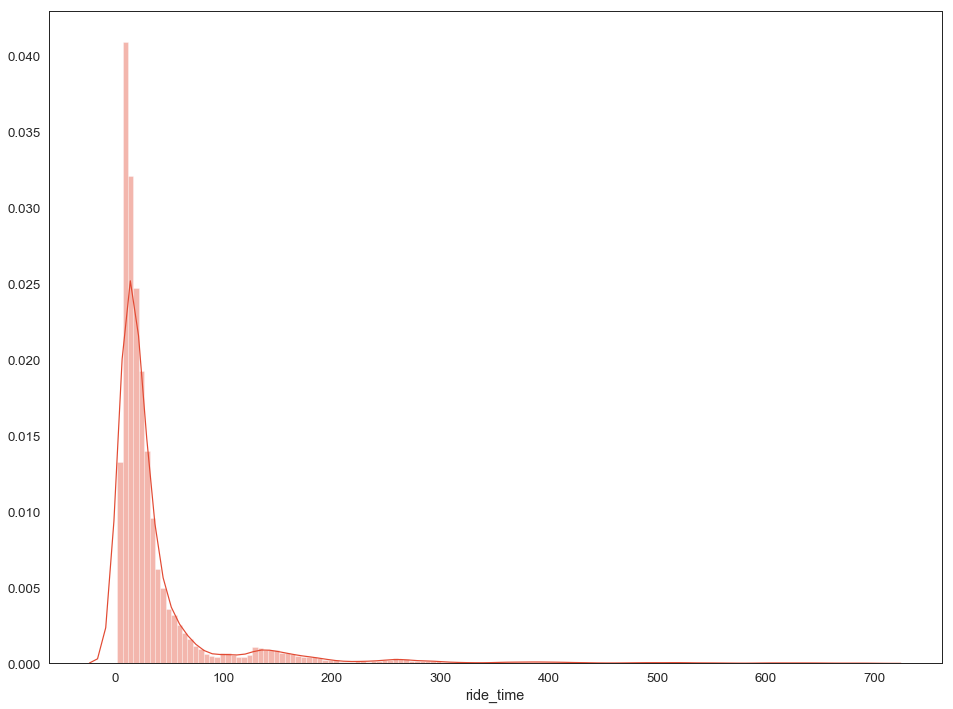

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

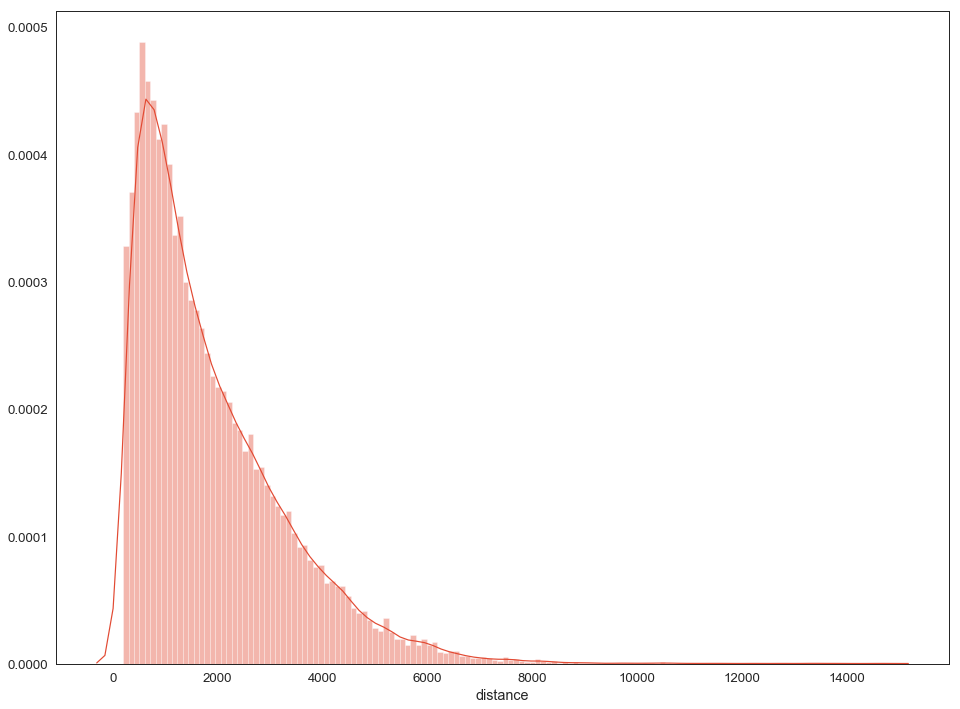

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
152,178,50.931808,6.932615,50.936888,6.920959,2020-03-28 14:30:02,2020-03-28 14:52:02,22.0,993.0,28745347,28750873,248.0,Köln Dasselstraße 64,BIKE 22382,1154
160,197,50.951395,6.915192,50.933751,6.921103,2020-03-11 10:57:02,2020-03-11 11:12:03,15.0,2006.0,28367211,28393942,1.0,"Ehrenfeld, Stammstraße, Köln",BIKE 21571,2634
265,330,50.951472,6.915788,50.951475,6.908080,2020-03-16 05:00:01,2020-03-16 13:10:02,490.0,540.0,28514685,28525402,236.0,Venloer Str. 474,BIKE 22257,2700
754,892,50.911722,6.963530,50.916969,6.960795,2020-03-31 09:22:02,2020-03-31 09:33:03,11.0,614.0,28759047,28791378,2438.0,Bonner Str. 211,BIKE 22839,1144
909,1082,50.923114,6.958786,50.935900,6.949068,2020-03-30 12:04:02,2020-03-30 13:15:02,71.0,1577.0,28758802,28779508,2459.0,Severinstraße 33,BIKE 22256,1090
914,1087,50.974713,7.013237,50.940882,6.963053,2020-03-01 13:14:01,2020-03-01 15:18:01,124.0,5150.0,28085229,28140654,794.0,Berliner Str. 129 Köln,BIKE 22781,2549
1010,1199,50.925918,6.958771,50.940504,7.025533,2020-03-07 10:25:02,2020-03-07 10:48:02,23.0,4953.0,28282581,28292177,784.0,Achterstraße 28,BIKE 21883,2543
1076,1278,50.956431,6.894089,50.943773,6.933279,2020-03-10 13:13:02,2020-03-10 13:43:02,30.0,3086.0,28365569,28371301,258.0,Wilhelm-Mauser-Str. 41 - 43,BIKE 21431,2613
1386,1709,50.923536,6.933673,50.928115,6.928551,2020-03-18 17:03:03,2020-03-18 17:32:02,29.0,623.0,28557803,28584610,1440.0,"Greinstraße 4, 50939 Köln",BIKE 22989,2690
1524,1868,50.943332,6.933414,50.941106,6.934431,2020-03-03 17:24:01,2020-03-03 17:28:01,4.0,258.0,28193843,28194432,11.0,Venloer Str. 42 50672 Köln,BIKE 22904,2475


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
238,299,50.961941,6.958186,50.933269,6.936742,2020-03-31 11:12:02,2020-03-31 11:37:02,25.0,3526.0,28783106,28792654,1100.0,NaN,BIKE 22745,1151
239,300,50.933269,6.936742,50.961924,6.958265,2020-03-31 18:27:02,2020-03-31 18:52:01,25.0,3526.0,28792654,28800233,410.0,NaN,BIKE 22745,1156
1400,1725,50.970081,7.009842,50.946063,6.974980,2020-03-27 13:17:02,2020-03-27 13:43:02,26.0,3620.0,28701306,28729587,2644.0,NaN,BIKE 22989,1568
1401,1726,50.946063,6.974980,50.970096,7.009812,2020-03-27 13:46:02,2020-03-27 14:05:02,19.0,3620.0,28729587,28730069,3.0,NaN,BIKE 22989,1361
1985,2507,50.952876,6.900536,50.951456,6.908100,2020-03-24 14:55:03,2020-03-24 15:01:02,6.0,553.0,28673217,28682638,1164.0,NaN,BIKE 21739,2669
1986,2508,50.951456,6.908100,50.953000,6.900602,2020-03-24 15:25:02,2020-03-24 15:32:02,7.0,553.0,28682638,28683229,24.0,NaN,BIKE 21739,2606
2287,2871,50.941506,6.973552,50.948837,6.981515,2020-03-08 16:48:01,2020-03-08 17:06:01,18.0,988.0,28323762,28324419,14.0,NaN,BIKE 22102,2548
2288,2872,50.948837,6.981515,50.941552,6.973438,2020-03-08 18:55:02,2020-03-08 19:05:01,10.0,988.0,28324419,28327448,109.0,NaN,BIKE 22102,2549
5330,6478,50.941011,6.892233,50.946407,6.886984,2020-03-08 09:15:02,2020-03-08 09:24:02,9.0,704.0,28292752,28313926,1314.0,NaN,BIKE 22750,2552
5331,6479,50.946407,6.886984,50.941115,6.892497,2020-03-08 14:01:01,2020-03-08 14:10:02,9.0,704.0,28313926,28319444,277.0,NaN,BIKE 22750,2563


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
1279,1534,50.913493,6.982677,50.974395,6.965866,2020-03-18 01:06:02,2020-03-18 01:12:02,6.0,6876.0,28532919,28566621,1911.0,NaN,BIKE 22303,2679,4000.0
2366,2966,50.900155,6.950198,50.982043,6.945330,2020-03-08 02:13:02,2020-03-08 02:29:02,16.0,9115.0,28297340,28310449,681.0,NaN,BIKE 22166,2558,9000.0
8374,10231,50.926180,6.898727,50.982070,6.945213,2020-03-23 23:03:02,2020-03-23 23:16:02,13.0,7018.0,28664145,28674954,778.0,NaN,BIKE 21960,2716,6500.0
11140,13623,50.955506,7.002777,50.855255,7.074516,2020-03-31 15:18:02,2020-03-31 15:30:02,12.0,12234.0,28767619,28796079,3015.0,NaN,BIKE 22726,1148,6500.0
11378,13914,50.976185,6.871290,50.953390,7.013443,2020-03-18 02:08:02,2020-03-18 02:28:02,20.0,10276.0,28559218,28567118,356.0,NaN,BIKE 21140,2698,9000.0
14254,17476,50.937503,6.870794,50.935499,6.931048,2020-03-27 16:55:02,2020-03-27 17:01:02,6.0,4229.0,28719141,28734703,1331.0,NaN,BIKE 22700,1556,4000.0
15093,18509,50.923829,6.927092,50.929012,6.973708,2020-03-01 15:47:01,2020-03-01 15:49:02,2.0,3319.0,27978228,28141499,947.0,NaN,BIKE 22739,2549,1500.0
17766,21725,50.949029,6.923529,50.953002,6.957163,2020-03-19 18:16:02,2020-03-19 18:19:02,3.0,2398.0,28601684,28609566,262.0,NaN,BIKE 21898,2695,1500.0
22220,27161,50.925332,6.700371,50.925338,6.909646,2020-03-09 15:09:02,2020-03-09 15:34:02,25.0,14673.0,28089805,28346421,12429.0,NaN,BIKE 21912,2549,11500.0
23134,28266,50.925057,6.911509,50.939729,7.012287,2020-03-28 14:38:02,2020-03-28 14:53:01,15.0,7251.0,28732398,28751269,1368.0,NaN,BIKE 21926,1199,6500.0


In [46]:
len(unmatched_distances)

17

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                            39716
Neumarkt 41-43 50667 Köln                          1
media park 7                                       1
Höninger Weg 179                                   1
Lukasstraße 4A,                                    1
marcel - proust - promenade                        1
Bonner Str. 211                                    1
Köln - Rochusstr. 236                              1
Kerbner Straße 23                                  1
Venloer straße / wahlen straße                     1
Köln - Philipp-Str / Stammstr.                     1
Mauritiussteinweg 26                               1
Ubierring 59                                       1
Luxemburger Str. / Hirzstraße                      1
Heinrichstraße 44                                  1
Hauptbahnhof/Bahnhofsvorplatz                      1
Chlodwigpl. 12, 50678 Köln                         1
Gottesweg 23                                       1
Aachener Weiher                               

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-03.csv', sep=';', index=False) 

In [52]:
len(df_c)

39915